<a href="https://colab.research.google.com/github/tanucsengg/Courera-Course/blob/main/Sentiment_Analysis_Using_Bert.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


**Sentiment analysis Using Bert**

In [3]:
import pandas as pd
file = r'/content/drive/MyDrive/Data/all-data.csv'
df = pd.read_csv( file, encoding='ISO-8859-1')
df.head()

,neutral,"According to Gran , the company has no plans to move all production to Russia , although that is where the company is growing ."
0,neutral,Technopolis plans to develop in stages an area...
1,negative,The international electronic industry company ...
2,positive,With the new production plant the company woul...
3,positive,According to the company 's updated strategy f...
4,positive,FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is ag...


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from wordcloud import WordCloud

In [5]:
df = df.rename(columns={'neutral':'sentiment','According to Gran , the company has no plans to move all production to Russia , although that is where the company is growing .':'statement'})

In [6]:
df.shape

(4845, 2)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4845 entries, 0 to 4844
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  4845 non-null   object
 1   statement  4845 non-null   object
dtypes: object(2)
memory usage: 75.8+ KB


In [9]:
df.describe()

,sentiment,statement
count,4845,4845
unique,3,4837
top,neutral,TELECOMWORLDWIRE-7 April 2006-TJ Group Plc sel...
freq,2878,2


In [10]:
df.drop_duplicates(subset=['statement'],keep='first',inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4837 entries, 0 to 4844
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  4837 non-null   object
 1   statement  4837 non-null   object
dtypes: object(2)
memory usage: 113.4+ KB


**WORD CLOUD**

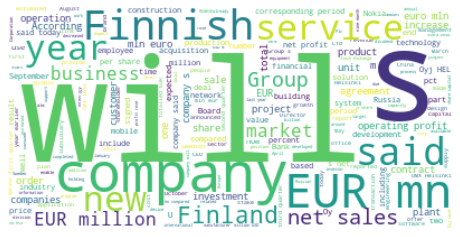

In [13]:
# code for generating the word size with the occurance of the frequency on sentiment
text = " ".join([x for x in df.statement])
wordcloud = WordCloud(background_color='white').generate(text)

plt.figure(figsize=(8,6))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

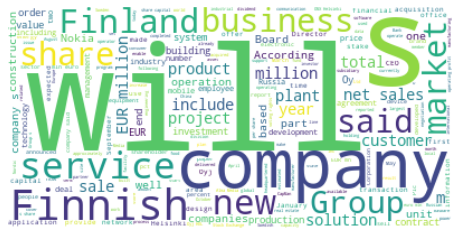

In [14]:
## for neutral sentiment word cloud 

text = " ".join([x for x in df.statement[df.sentiment=='neutral']])

wordcloud = WordCloud(background_color='white').generate(text)

plt.figure(figsize=(8,6))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

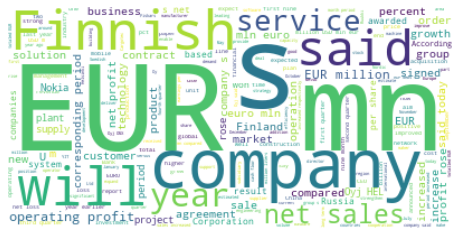

In [15]:
## for positive sentiment Word Cloud 

text = " ".join([x for x in df.statement[df.sentiment=='positive']])

wordcloud = WordCloud(background_color='white').generate(text)

plt.figure(figsize=(8,6))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

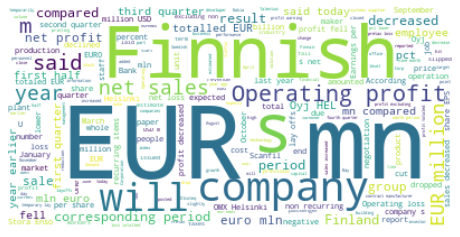

In [16]:
## for negative sentiment Word Cloud 

text = " ".join([x for x in df.statement[df.sentiment=='negative']])

wordcloud = WordCloud(background_color='white').generate(text)

plt.figure(figsize=(8,6))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

**Count Plot on Sentiments**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


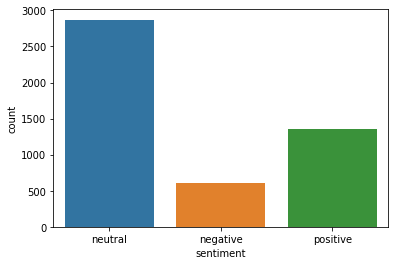

In [17]:
sns.countplot(df.sentiment)

In [18]:
df['sentiment'].value_counts()

neutral     2871
positive    1362
negative     604
Name: sentiment, dtype: int64

neutral is the maximum then followed by positive and negative sentiments 

**Test and Train Datasets**

In [41]:
train,eva = train_test_split(df,test_size = 0.2)
print(train)
print(eva)

     sentiment                                          statement
1991  positive  Markets had been expecting a poor performance ...
2806   neutral  Arena Partners Oy is a development company for...
312   positive  With the extension of the new contract for a f...
4001  negative  A total of 16.5 mn passenger ship journeys too...
4571   neutral  One of the headboxes will be equipped with a m...
...        ...                                                ...
3164   neutral  The Bank of +_land acquired the private bankin...
3029   neutral  Metso Foundries Jyvaskyla Oy will discontinue ...
4719  negative  The fair value of the company 's investment pr...
2681   neutral            The site will cover over six hectares .
2586   neutral  The Board of Directors was authorized to decid...

[3869 rows x 2 columns]
     sentiment                                          statement
219   positive  In the third quarter , net sales increased by ...
3418   neutral  They will be sunk to a depth of som

dividing the dataset into train and test in the ratio of 80: 20

**Building  A Model**

In [20]:
!pip install simpletransformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 249 kB 6.7 MB/s 
     |████████████████████████████████| 365 kB 62.0 MB/s 
     |████████████████████████████████| 43 kB 2.7 MB/s 
     |████████████████████████████████| 1.3 MB 47.6 MB/s 
     |████████████████████████████████| 6.6 MB 43.5 MB/s 
     |████████████████████████████████| 4.7 MB 37.7 MB/s 
     |████████████████████████████████| 9.1 MB 55.6 MB/s 
     |████████████████████████████████| 1.8 MB 39.4 MB/s 
     |████████████████████████████████| 596 kB 69.7 MB/s 
     |████████████████████████████████| 101 kB 13.7 MB/s 
     |████████████████████████████████| 157 kB 59.9 MB/s 
     |████████████████████████████████| 181 kB 65.8 MB/s 
     |████████████████████████████████| 63 kB 2.3 MB/s 
     |████████████████████████████████| 157 kB 51.2 MB/s 
     |████████████████████████████████| 156 kB 57.2 MB/s 
     |██████████████████████████████

In [21]:
from simpletransformers.classification import ClassificationModel


# Create a TransformerModel
model = ClassificationModel('bert', 'bert-base-cased', num_labels=3, args={'reprocess_input_data': True, 'overwrite_output_dir': True},use_cuda=False)

Some weights of the model checkpoint at bert-base-cased were not used when initializing BertForSequenceClassification: ['cls.predictions.decoder.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at b

Working in Simple transformer model in Classification model we used Bert with three labels : Neutral, positive and Negative

In [22]:
# 0,1,2 : positive,negative
def making_label(st):
    if(st=='positive'):
        return 0
    elif(st=='neutral'):
        return 2
    else:
        return 1
    
train['label'] = train['sentiment'].apply(making_label)
eva['label'] = eva['sentiment'].apply(making_label)
print(train.shape)

(3869, 3)


Applying the Label to the sentiment feature with the value as **positive:0,negative:1,neutral:2** to the train and test dataset

In [23]:
train_df = pd.DataFrame({
    'text': train['statement'][:1500].replace(r'\n', ' ', regex=True),
    'label': train['label'][:1500]
})

eval_df = pd.DataFrame({
    'text': eva['statement'][-400:].replace(r'\n', ' ', regex=True),
    'label': eva['label'][-400:]
})

 two seperate dataframe would be created for train and evaluation dividing it into two parts text and label 

In [24]:
model.train_model(train_df)

/usr/local/lib/python3.7/dist-packages/simpletransformers/classification/classification_model.py:602: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  "Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels."


  0%|          | 0/1500 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/transformers/optimization.py:310: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,


Epoch:   0%|          | 0/1 [00:00<?, ?it/s]

Running Epoch 0 of 1:   0%|          | 0/188 [00:00<?, ?it/s]

(188, 0.6350006631159402)

In [25]:
result, model_outputs, wrong_predictions = model.eval_model(eval_df)

/usr/local/lib/python3.7/dist-packages/simpletransformers/classification/classification_model.py:1443: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  "Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels."


  0%|          | 0/400 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/50 [00:00<?, ?it/s]

Result and model_outputs and wrong predictions 

**Model Evaluation** 

In [26]:
result

{'eval_loss': 0.45814633525907994, 'mcc': 0.6879464679876469}

In [27]:
model_outputs

array([[ 0.29418385, -1.44344771,  2.93574786],
       [-0.23050547, -1.3485291 ,  3.30438042],
       [ 0.49160692,  1.01492405, -1.2707504 ],
       ...,
       [ 0.35334754,  1.42725015, -0.72757119],
       [ 0.17410669,  1.15451336,  0.66951752],
       [-0.23983136, -1.96584404,  2.70529509]])

In [43]:
lst = []
for arr in model_outputs:
    lst.append(np.argmax(arr))
print(lst)

[2, 2, 1, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 0, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 0, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 0, 1, 1, 0, 0, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 0, 2, 1, 0, 2, 2, 2, 2, 0, 2, 0, 1, 0, 0, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 1, 0, 2, 2, 2, 2, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 1, 0, 1, 2, 1, 2, 0, 2, 2, 1, 1, 0, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 0, 0, 1, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 0, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 0, 2, 2, 2, 2, 1, 1, 2, 0, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 0, 1, 1, 1, 0, 0, 0, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 1, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 1, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 0, 0, 0, 2, 2, 2, 

In [29]:
true = eval_df['label'].tolist()
predicted = lst

In [30]:
import sklearn
mat = sklearn.metrics.confusion_matrix(true , predicted)
mat

array([[ 82,   7,  45],
       [  2,  34,   7],
       [  8,   2, 213]])

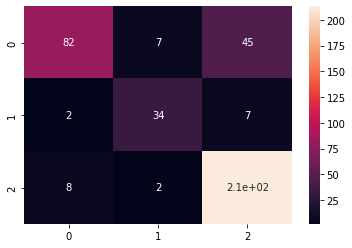

In [31]:
df_cm = pd.DataFrame(mat, range(3), range(3))

sns.heatmap(df_cm, annot=True) 
plt.show()

In [32]:
sklearn.metrics.classification_report(true,predicted,target_names=['positive','neutral','negative'])

'              precision    recall  f1-score   support\n\n    positive       0.89      0.61      0.73       134\n     neutral       0.79      0.79      0.79        43\n    negative       0.80      0.96      0.87       223\n\n    accuracy                           0.82       400\n   macro avg       0.83      0.79      0.80       400\nweighted avg       0.83      0.82      0.81       400\n'

In [33]:
sklearn.metrics.accuracy_score(true,predicted)

0.8225

**Test the result**

In [34]:
def get_result(statement):
    result = model.predict([statement])
    pos = np.where(result[1][0] == np.amax(result[1][0]))
    pos = int(pos[0])
    sentiment_dict = {0:'positive',1:'negative',2:'neutral'}
    print(sentiment_dict[pos])
    return

In [35]:
## neutral statement
get_result("According to Gran , the company has no plans to move all production to Russia , although that is where the company is growing .")

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

neutral


In [36]:
## positive statement
get_result("According to the company 's updated strategy for the years 2009-2012 , Basware targets a long-term net sales growth in the range of 20 % -40 % with an operating profit margin of 10 % -20 % of net sales .")

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

positive


In [37]:
## negative statement
get_result('Sales in Finland decreased by 2.0 % , and international sales decreased by 9.3 % in terms of euros , and by 15.1 % in terms of local currencies .')

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

negative


In [38]:
statement = "Give your statement"
get_result(statement)

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

neutral


In [39]:
statement = "This is good and we like the way it is working"
get_result(statement)

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

neutral


Model is working good if the statemnet is from the dataset only if not it is not giving good results . Like This is good and we like the way it is working this statement is positive as the words good , like but even though it predicted the output as neutral. 